In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 作業一：加入ETF其他資訊，並且建模

In [2]:
df = pd.read_csv('../etf_data/AADR.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-02-15,45.580002,45.799999,45.580002,45.779999,7800,45.779999
1,2017-02-14,45.900002,45.900002,44.950001,45.450001,22000,45.450001
2,2017-02-13,45.799999,45.799999,45.380001,45.619999,30300,45.619999
3,2017-02-10,44.919998,45.270000,44.770000,45.070000,9200,45.070000
4,2017-02-09,44.320000,44.570000,44.290001,44.330002,3400,44.330002
5,2017-02-08,43.939999,44.369999,43.939999,44.369999,4500,44.369999
6,2017-02-07,45.000000,45.000000,44.189999,44.220001,7400,44.220001
7,2017-02-06,45.380001,45.380001,44.150002,44.619999,7400,44.619999
8,2017-02-03,45.880001,45.880001,44.820000,44.959999,6200,44.959999
9,2017-02-02,44.689999,45.080002,44.580002,45.000000,13300,45.000000


In [4]:
def to_np_array(df):
    return np.array(list(reversed(df))).reshape(len(list(reversed(df))), 1)

In [5]:
Open     = to_np_array(df['Open'])
High     = to_np_array(df['High'])
Low      = to_np_array(df['Low'])
Close    = to_np_array(df['Close'])
Volume    = to_np_array(df['Volume'])
AdjClose = to_np_array(df['Adj Close'])

In [6]:
Open.shape

(1656, 1)

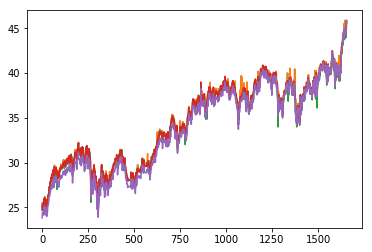

In [7]:
plt.plot(Open)
plt.plot(High)
plt.plot(Low)
plt.plot(Close)
plt.plot(AdjClose)

In [8]:
Open.shape

(1656, 1)

In [9]:
d = np.concatenate((Open, High, Low, Close, AdjClose), axis=1)

In [10]:
d[:1].shape

(1, 5)

In [11]:
d_change = []
for i in range(len(d)-1):
    d_change.append((d[i+1]-d[i])/d[i])
d_change = np.array(d_change)

In [12]:
d_change.shape

(1655, 5)

In [13]:
data = np.concatenate((d[1:], d_change, Volume[1:]), axis=1)

In [14]:
data.shape

(1655, 11)

In [15]:
X = []
Y = []
for index in range(data.shape[0]-21):
    X.append(data[index:index+20])
    Y.append(data[index+21][9])
x = np.array(X)
y = np.array(Y)

In [16]:
x.shape # 1634 筆資料 and 每一筆資料都是一個2維陣列

(1634, 20, 11)

In [17]:
y.shape # 輸出為一維

(1634,)

In [18]:
y = y.reshape(y.shape[0],1)

In [19]:
y.shape

(1634, 1)

In [20]:
x_train = x[0:1300]
y_train = y[0:1300]
x_test  = x[1300:1635]
y_test  = y[1300:1635]

In [21]:
x_train.shape

(1300, 20, 11)

In [22]:
y_train.shape

(1300, 1)

In [23]:
x_test.shape

(334, 20, 11)

In [24]:
y_test.shape

(334, 1)

In [25]:
from keras.utils import np_utils # one-hot embedding
from keras.models import Sequential # Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD 

Using TensorFlow backend.


In [26]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [27]:
import tensorflow as tf
from keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

In [28]:
model_etf = Sequential()
model_etf.add(Dense(2000, input_shape=(20,11) ) )
model_etf.add(Activation('relu'))
model_etf.add(Dense(100))
model_etf.add(Activation('relu'))
model_etf.add(Flatten())
model_etf.add(Dense(100))
model_etf.add(Activation('relu'))
model_etf.add(Dense(1))
model_etf.add(Activation('softmax'))
model_etf.summary()
model_etf.compile(loss='binary_crossentropy', optimizer='SGD')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20, 2000)          24000     
_________________________________________________________________
activation_1 (Activation)    (None, 20, 2000)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 20, 100)           200100    
_________________________________________________________________
activation_2 (Activation)    (None, 20, 100)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               200100    
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
__________

In [29]:
model_etf.fit(x_train, y_train)

Epoch 1/10
1300/1300 [==============================] - 1s - loss: 15.9362     
Epoch 2/10
1300/1300 [==============================] - 0s - loss: 15.9362     
Epoch 3/10
1300/1300 [==============================] - 0s - loss: 15.9362     
Epoch 4/10
1300/1300 [==============================] - 0s - loss: 15.9362     
Epoch 5/10
1300/1300 [==============================] - 0s - loss: 15.9362     
Epoch 6/10
1300/1300 [==============================] - 0s - loss: 15.9362     
Epoch 7/10
1300/1300 [==============================] - 0s - loss: 15.9362     
Epoch 8/10
1300/1300 [==============================] - 0s - loss: 15.9362     
Epoch 9/10
1300/1300 [==============================] - 0s - loss: 15.9362     
Epoch 10/10
1300/1300 [==============================] - 0s - loss: 15.9362     


# 作業二：盡量調整你的模型數值，看看能不能改進他